In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from datetime import datetime
%matplotlib inline

In [2]:
# Import datset
df = pd.read_csv("loan_final313.csv")
display(df.head())
display(df.shape)

,id,year,issue_d,final_d,emp_length_int,home_ownership,home_ownership_cat,income_category,annual_inc,income_cat,...,loan_condition_cat,interest_rate,grade,grade_cat,dti,total_pymnt,total_rec_prncp,recoveries,installment,region
0,1077501,2011,01/12/2011,1012015,10.0,RENT,1,Low,24000,1,...,0,10.65,B,2,27.65,5861.071414,5000.00,0.00,162.87,munster
1,1077430,2011,01/12/2011,1042013,0.5,RENT,1,Low,30000,1,...,1,15.27,C,3,1.00,1008.710000,456.46,117.08,59.83,leinster
2,1077175,2011,01/12/2011,1062014,10.0,RENT,1,Low,12252,1,...,0,15.96,C,3,8.72,3003.653644,2400.00,0.00,84.33,cannught
3,1076863,2011,01/12/2011,1012015,10.0,RENT,1,Low,49200,1,...,0,13.49,C,3,20.00,12226.302210,10000.00,0.00,339.31,ulster
4,1075358,2011,01/12/2011,1012016,1.0,RENT,1,Low,80000,1,...,0,12.69,B,2,17.94,3242.170000,2233.10,0.00,67.79,ulster


(887379, 30)

In [3]:
# Choose 10 major features
df0 = df.iloc[:,[8, 4, 21, 10, 12, 20, 6, 16, 18, 23]]
display(df0.head())

,annual_inc,emp_length_int,interest_rate,loan_amount,term_cat,loan_condition_cat,home_ownership_cat,purpose_cat,interest_payment_cat,grade_cat
0,24000,10.0,10.65,5000,1,0,1,1,1,2
1,30000,0.5,15.27,2500,2,1,1,2,2,3
2,12252,10.0,15.96,2400,1,0,1,3,2,3
3,49200,10.0,13.49,10000,1,0,1,4,2,3
4,80000,1.0,12.69,3000,2,0,1,4,1,2


In [4]:
# Construct dataframe for independent variables X and response variable y
X1 = df0.iloc[:,:-1]
y1 = df0.iloc[:,-1]

In [5]:
# Scale the dataframe X1
X1_scale = MinMaxScaler().fit_transform(X1)
display(pd.DataFrame(X1_scale, columns=X1.columns).head())

,annual_inc,emp_length_int,interest_rate,loan_amount,term_cat,loan_condition_cat,home_ownership_cat,purpose_cat,interest_payment_cat
0,0.002526,1.000000,0.225180,0.130435,0.0,0.0,0.0,0.000000,0.0
1,0.003158,0.000000,0.420363,0.057971,1.0,1.0,0.0,0.076923,1.0
2,0.001290,1.000000,0.449514,0.055072,0.0,0.0,0.0,0.153846,1.0
3,0.005179,1.000000,0.345163,0.275362,0.0,0.0,0.0,0.230769,1.0
4,0.008421,0.052632,0.311365,0.072464,1.0,0.0,0.0,0.230769,0.0


# Case 1.1 KNN(default) on raw data

In [7]:
# Split dataset to the train and test set 
X_train, X_test, y_train, y_test = train_test_split(X1_scale, y1, random_state=0, test_size=0.25)
# Create an instance
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
# Apply KNN to the training set
start=datetime.now()
knn.fit(X_train, y_train)
# Compare the predicted y and actual y
y_pred = knn.predict(X_test)
print (datetime.now()-start)
display(metrics.accuracy_score(y_test, y_pred))

0:07:49.180057


0.8498365976244675

* Since the computation cost is heavy, loop fucntion for various neighbors will be skipped.

# Case 1.2 KNN(change 'distance' to 'uniform') on raw data

In [ ]:
# Split dataset to the train and test set 
X_train, X_test, y_train, y_test = train_test_split(X1_scale, y1, random_state=0, test_size=0.25)
# Create an instance
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')
# Apply KNN to the training set
start=datetime.now()
knn.fit(X_train, y_train)
# Compare the predicted y and actual y
y_pred = knn.predict(X_test)
print (datetime.now()-start)
display(metrics.accuracy_score(y_test, y_pred))

# Case 1.3 KNN(change test_size from 0.25 to 0.5) on raw data

In [8]:
# Split dataset to the train and test set 
X_train, X_test, y_train, y_test = train_test_split(X1_scale, y1, random_state=0, test_size=0.5)
# Create an instance
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
# Apply KNN to the training set
start=datetime.now()
knn.fit(X_train, y_train)
# Compare the predicted y and actual y
y_pred = knn.predict(X_test)
print (datetime.now()-start)
display(metrics.accuracy_score(y_test, y_pred))

0:04:15.177229


0.8039689873560368

# Case 1.4 KNN(change neighbors from 5 to 10) on raw data

In [9]:
# Split dataset to the train and test set 
X_train, X_test, y_train, y_test = train_test_split(X1_scale, y1, random_state=0, test_size=0.5)
# Create an instance
knn = KNeighborsClassifier(n_neighbors=10, weights='distance')
# Apply KNN to the training set
start=datetime.now()
knn.fit(X_train, y_train)
# Compare the predicted y and actual y
y_pred = knn.predict(X_test)
print (datetime.now()-start)
display(metrics.accuracy_score(y_test, y_pred))

0:05:03.387734


0.8121864364759178

# Case 2.1 KNN(default) on PCA(n=2)

In [15]:
# Conduct PCA
# Create instances and fit the model
pca_model = PCA(n_components=2).fit(X1_scale)
# Convert to a dataframe
X1_trans = pd.DataFrame(pca_model.transform(X1_scale), columns=['pca1', 'pca2'])
display(X1_trans.head())

,pca1,pca2
0,-0.600901,0.152540
1,0.802580,-0.260676
2,0.203518,-0.439352
3,0.210642,-0.372705
4,-0.036304,0.402162


In [16]:
# Split dataset to the train and test set 
X_train, X_test, y_train, y_test = train_test_split(X1_trans, y1, random_state=0, test_size=0.25)
# Create an instance
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
# Apply KNN to the training set
start=datetime.now()
knn.fit(X_train, y_train)
# Compare the predicted y and actual y
y_pred = knn.predict(X_test)
print (datetime.now()-start)
display(metrics.accuracy_score(y_test, y_pred))

0:00:04.656070


0.7454348757015034

In [12]:
# loop function to choose various # of neighbors
k_range = range(1,21)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance').fit(X_train, y_train)  
    y_pred = knn.predict(X_test)
    scores.append(round(metrics.accuracy_score(y_test, y_pred), 3))
    
print(scores)

[0.577, 0.577, 0.604, 0.613, 0.622, 0.628, 0.634, 0.638, 0.642, 0.645, 0.648, 0.65, 0.652, 0.654, 0.656, 0.657, 0.659, 0.66, 0.661, 0.661]


Text(0, 0.5, 'Test accuracy')

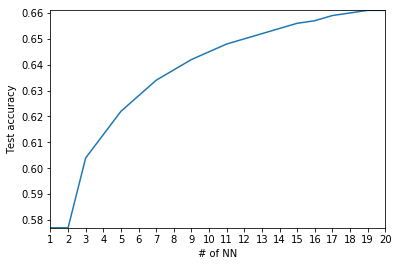

In [13]:
# plot for various # of neighborhoods
plt.plot(k_range, scores)
plt.axis([1, 20, min(scores), max(scores)])
plt.xticks(k_range)
plt.xlabel('# of NN')
plt.ylabel('Test accuracy')

The accuracy is less than 0.67, because transforming 9 variables to only 2 variables loses considerable inforamtion of the original dataset, so we need to adjust the number of pca components in Case 3.

# Case 2.2 KNN (change 'distance' to 'uniform') on PCA(n=2)

In [14]:
# Split dataset to the train and test set 
X_train, X_test, y_train, y_test = train_test_split(X1_trans, y1, random_state=0, test_size=0.25)
# Create an instance
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')
# Apply KNN to the training set
start=datetime.now()
knn.fit(X_train, y_train)
# Compare the predicted y and actual y
y_pred = knn.predict(X_test)
print (datetime.now()-start)
display(metrics.accuracy_score(y_test, y_pred))

0:00:03.517661


0.6291870450089027

In [15]:
# loop function to choose various # of neighbors
k_range = range(1,21)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, weights='uniform').fit(X_train, y_train)  
    y_pred = knn.predict(X_test)
    scores.append(round(metrics.accuracy_score(y_test, y_pred), 3))
    
print(scores)

[0.577, 0.588, 0.602, 0.623, 0.629, 0.637, 0.641, 0.646, 0.648, 0.652, 0.653, 0.656, 0.657, 0.659, 0.66, 0.661, 0.661, 0.662, 0.663, 0.663]


Text(0, 0.5, 'Test accuracy')

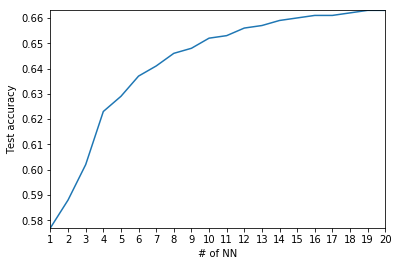

In [16]:
# plot for various # of neighborhoods
plt.plot(k_range, scores)
plt.axis([1, 20, min(scores), max(scores)])
plt.xticks(k_range)
plt.xlabel('# of NN')
plt.ylabel('Test accuracy')

# Case 2.3 KNN (test_size from 0.1 to 0.5) on PCA(n=2)

In [17]:
# Split dataset to the train and test set 
X_train, X_test, y_train, y_test = train_test_split(X1_trans, y1, random_state=0, test_size=0.5)
# Create an instance
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
# Apply KNN to the training set
start=datetime.now()
knn.fit(X_train, y_train)
# Compare the predicted y and actual y
y_pred = knn.predict(X_test)
print (datetime.now()-start)
display(metrics.accuracy_score(y_test, y_pred))

0:00:05.399274


0.6188374766165566

In [18]:
# loop function to choose various # of neighbors
size_range = np.arange(0.1, 0.5, 0.05)
scores = []

for size in size_range:
    X_train, X_test, y_train, y_test = train_test_split(X1_trans, y1, random_state=0, test_size=size)
    knn = KNeighborsClassifier(n_neighbors=5, weights='distance').fit(X_train, y_train)  
    y_pred = knn.predict(X_test)
    scores.append(round(metrics.accuracy_score(y_test, y_pred), 3))
    
print(scores)

[0.625, 0.624, 0.623, 0.622, 0.622, 0.622, 0.62, 0.62]


Text(0, 0.5, 'Test accuracy')

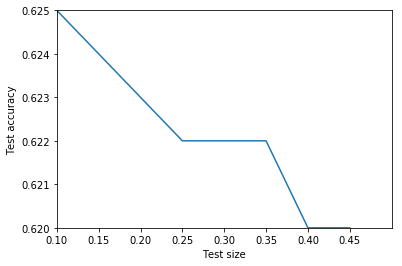

In [19]:
# plot for various # of neighborhoods
plt.plot(size_range, scores)
plt.axis([0.1, 0.5, min(scores), max(scores)])
plt.xticks(size_range)
plt.xlabel('Test size')
plt.ylabel('Test accuracy')

# Case 2.4 KNN (change euclidean to manhattan_distance) on PCA(n=2)

In [20]:
# Split dataset to the train and test set 
X_train, X_test, y_train, y_test = train_test_split(X1_trans, y1, random_state=0, test_size=0.25)
# Create an instance
knn = KNeighborsClassifier(n_neighbors=5, weights='distance', p=1) # manhattan distance
# Apply KNN to the training set
start=datetime.now()
knn.fit(X_train, y_train)
# Compare the predicted y and actual y
y_pred = knn.predict(X_test)
print (datetime.now()-start)
display(metrics.accuracy_score(y_test, y_pred))

0:00:04.371960


0.6229169014401947

In [23]:
# loop function to choose various # of neighbors
k_range = range(1,21)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance', p=1).fit(X_train, y_train)  
    y_pred = knn.predict(X_test)
    scores.append(round(metrics.accuracy_score(y_test, y_pred), 3))
    
print(scores)

[0.578, 0.578, 0.605, 0.614, 0.623, 0.63, 0.635, 0.639, 0.643, 0.646, 0.649, 0.651, 0.653, 0.654, 0.656, 0.657, 0.659, 0.66, 0.661, 0.662]


Text(0, 0.5, 'Test accuracy')

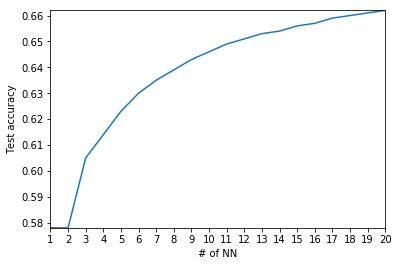

In [24]:
# plot for various # of neighborhoods
plt.plot(k_range, scores)
plt.axis([1, 20, min(scores), max(scores)])
plt.xticks(k_range)
plt.xlabel('# of NN')
plt.ylabel('Test accuracy')

# Case 3.1 KNN(default) on PCA(n=5)

In [25]:
# Conduct PCA
# Create instances and fit the model
pca_model = PCA(n_components=5).fit(X1_scale)
# Convert to a dataframe
X1_trans = pd.DataFrame(pca_model.transform(X1_scale), columns=['pca1', 'pca2', 'pca3', 'pca4',  'pca5'])
display(X1_trans.head())

,pca1,pca2,pca3,pca4,pca5
0,-0.600901,0.152540,-0.362126,-0.016072,-0.279143
1,0.802580,-0.260676,0.650297,0.861605,-0.450701
2,0.203518,-0.439352,-0.593714,-0.135197,-0.289843
3,0.210642,-0.372705,-0.580720,-0.135590,-0.097121
4,-0.036304,0.402162,0.833884,-0.006345,-0.552889


In [26]:
# Split dataset to the train and test set 
X_train, X_test, y_train, y_test = train_test_split(X1_trans, y1, random_state=0, test_size=0.1)
# Create an instance
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
# Apply KNN to the training set
start=datetime.now()
knn.fit(X_train, y_train)
# Compare the predicted y and actual y
y_pred = knn.predict(X_test)
print (datetime.now()-start)
display(metrics.accuracy_score(y_test, y_pred))

0:00:04.550830


0.8443733237170096

* Compare the result of  case 3.1 and 1.1, while the different of accuracy is about 1%, the speed is 30X faster.
* Compare the result of  case 3.1 and 2.1, while the different of time is about 8 seconds, the accuracy is increased by more than 10%.
* Therefore, PCA with 5 components is a satisfactory choice in terms of both accuracy and speed.

In [12]:
# loop function to choose various # of neighbors
k_range = range(1,21)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance').fit(X_train, y_train)  
    y_pred = knn.predict(X_test)
    scores.append(round(metrics.accuracy_score(y_test, y_pred), 3))
    
print(scores)

[0.826, 0.825, 0.833, 0.836, 0.838, 0.839, 0.84, 0.841, 0.841, 0.842, 0.842, 0.842, 0.842, 0.843, 0.842, 0.842, 0.842, 0.842, 0.842, 0.842]


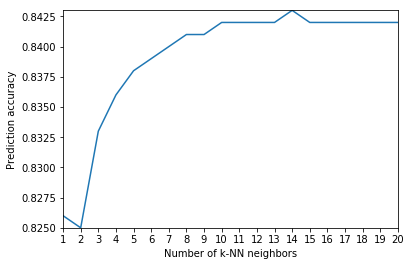

In [14]:
# plot for various # of neighborhoods
plt.plot(k_range, scores)
plt.axis([1, 20, min(scores), max(scores)])
plt.xticks(k_range)
plt.xlabel('Number of k-NN neighbors')
plt.ylabel('Prediction accuracy')
plt.savefig('num_knn.png')

# Case 3.2 KNN(change 'distance' to 'uniform') on PCA(n=5)

In [9]:
# Split dataset to the train and test set 
X_train, X_test, y_train, y_test = train_test_split(X1_trans, y1, random_state=0, test_size=0.25)
# Create an instance
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')
# Apply KNN to the training set
start=datetime.now()
knn.fit(X_train, y_train)
# Compare the predicted y and actual y
y_pred = knn.predict(X_test)
print (datetime.now()-start)
display(metrics.accuracy_score(y_test, y_pred))

0:00:06.936189


0.816304176339336

In [30]:
# loop function to choose various # of neighbors
k_range = range(1,21)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, weights='uniform').fit(X_train, y_train)  
    y_pred = knn.predict(X_test)
    scores.append(round(metrics.accuracy_score(y_test, y_pred), 3))
    
print(scores)

[0.777,
 0.758,
 0.788,
 0.782,
 0.795,
 0.79,
 0.797,
 0.794,
 0.798,
 0.795,
 0.798,
 0.795,
 0.797,
 0.796,
 0.798,
 0.796,
 0.797,
 0.796,
 0.797,
 0.795]

Text(0, 0.5, 'Test accuracy')

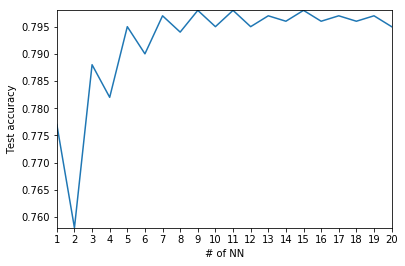

In [31]:
# plot for various # of neighborhoods
plt.plot(k_range, scores)
plt.axis([1, 20, min(scores), max(scores)])
plt.xticks(k_range)
plt.xlabel('# of NN')
plt.ylabel('Test accuracy')

# Case 3.3 KNN( 'test_size' from 0.1 to 0.5) on PCA(n=5)

In [16]:
# Split dataset to the train and test set 
X_train, X_test, y_train, y_test = train_test_split(X1_trans, y1, random_state=0, test_size=0.1)
# Create an instance
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
# Apply KNN to the training set
start=datetime.now()
knn.fit(X_train, y_train)
# Compare the predicted y and actual y
y_pred = knn.predict(X_test)
print (datetime.now()-start)
display(metrics.accuracy_score(y_test, y_pred))

0:00:04.815276


0.8443733237170096

In [21]:
# loop function to choose various size of 
size_range = np.arange(0.1, 0.5, 0.05)
scores = []

for size in size_range:
    X_train, X_test, y_train, y_test = train_test_split(X1_trans, y1, random_state=0, test_size=size)
    knn = KNeighborsClassifier(n_neighbors=5, weights='distance').fit(X_train, y_train)  
    y_pred = knn.predict(X_test)
    scores.append(round(metrics.accuracy_score(y_test, y_pred), 3))
    
print(scores)

[0.844, 0.842, 0.84, 0.838, 0.836, 0.834, 0.83, 0.827]


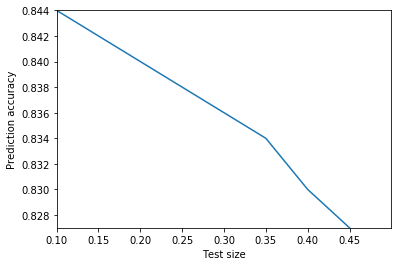

In [22]:
# plot for various # of neighborhoods
plt.plot(size_range, scores)
plt.axis([0.1, 0.5, min(scores), max(scores)])
plt.xticks(size_range)
plt.xlabel('Test size')
plt.ylabel('Prediction accuracy')
plt.savefig('accu_testsize')

# Case 3.4 KNN (change euclidean to manhattan_distance) on PCA(n=5)

In [27]:
# Split dataset to the train and test set 
X_train, X_test, y_train, y_test = train_test_split(X1_trans, y1, random_state=0, test_size=0.1)
# Create an instance
knn = KNeighborsClassifier(n_neighbors=5, weights='distance', p=1) # manhattan distance
# Apply KNN to the training set
start=datetime.now()
knn.fit(X_train, y_train)
# Compare the predicted y and actual y
y_pred = knn.predict(X_test)
print (datetime.now()-start)
display(metrics.accuracy_score(y_test, y_pred))

0:00:04.856974


0.8461087696364579

In [36]:
# loop function to choose various # of neighbors
k_range = range(1,21)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance').fit(X_train, y_train)  
    y_pred = knn.predict(X_test)
    scores.append(round(metrics.accuracy_score(y_test, y_pred), 3))
    
print(scores)

[0.777, 0.777, 0.793, 0.796, 0.801, 0.803, 0.805, 0.806, 0.807, 0.808, 0.807, 0.808, 0.808, 0.808, 0.808, 0.809, 0.808, 0.809, 0.809, 0.809]


Text(0, 0.5, 'Test accuracy')

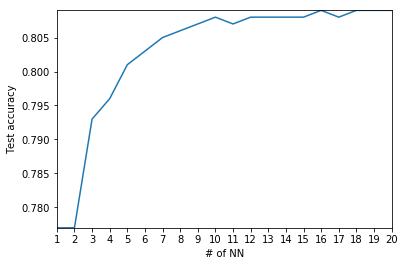

In [37]:
# plot for various # of neighborhoods
plt.plot(k_range, scores)
plt.axis([1, 20, min(scores), max(scores)])
plt.xticks(k_range)
plt.xlabel('# of NN')
plt.ylabel('Test accuracy')

# Case 4.1 Standard Scaling on raw dataset

In [10]:
X1_scale2 = StandardScaler().fit_transform(X1)
display(pd.DataFrame(X1_scale2, columns=X1.columns).head())

,annual_inc,emp_length_int,interest_rate,loan_amount,term_cat,loan_condition_cat,home_ownership_cat,purpose_cat,interest_payment_cat
0,-0.788703,1.126029,-0.592611,-1.156460,-0.654724,-0.286767,-1.1633,-1.627203,-0.95239
1,-0.695964,-1.582528,0.461735,-1.452829,1.527360,3.487148,-1.1633,-1.207238,1.04999
2,-0.970285,1.126029,0.619202,-1.464683,-0.654724,-0.286767,-1.1633,-0.787274,1.04999
3,-0.399202,1.126029,0.055515,-0.563724,-0.654724,-0.286767,-1.1633,-0.367309,1.04999
4,0.076856,-1.439973,-0.127055,-1.393555,1.527360,-0.286767,-1.1633,-0.367309,-0.95239


In [11]:
# Split dataset to the train and test set 
X_train, X_test, y_train, y_test = train_test_split(X1_scale2, y1, random_state=0, test_size=0.25)
# Create an instance
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
# Apply KNN to the training set
start=datetime.now()
knn.fit(X_train, y_train)
# Compare the predicted y and actual y
y_pred = knn.predict(X_test)
print (datetime.now()-start)
display(metrics.accuracy_score(y_test, y_pred))

0:05:16.775324


0.8114539430683585

# Case 4.2 Standard Scaling on PCA(n=5)

In [9]:
# Conduct PCA
# Create instances and fit the model
pca_model = PCA(n_components=5).fit(X1_scale2)
# Convert to a dataframe
X1_trans = pd.DataFrame(pca_model.transform(X1_scale2), columns=['pca1', 'pca2', 'pca3', 'pca4',  'pca5'])
display(X1_trans.head())

,pca1,pca2,pca3,pca4,pca5
0,-1.801376,-0.729314,0.157420,-1.846509,-0.230227
1,1.335095,-2.620087,1.650278,-0.992293,2.716958
2,0.036806,-1.803787,-0.549773,-1.457464,-0.590940
3,0.053096,-0.981897,-0.401173,-0.798042,-0.411365
4,-0.540469,-1.014896,1.443170,0.352178,-0.515979


In [40]:
# Split dataset to the train and test set 
X_train, X_test, y_train, y_test = train_test_split(X1_trans, y1, random_state=0, test_size=0.25)
# Create an instance
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
# Apply KNN to the training set
start=datetime.now()
knn.fit(X_train, y_train)
# Compare the predicted y and actual y
y_pred = knn.predict(X_test)
print (datetime.now()-start)
display(metrics.accuracy_score(y_test, y_pred))

0:00:07.621963


0.8380310577204805

In [41]:
# loop function to choose various # of neighbors
k_range = range(1,21)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance').fit(X_train, y_train)  
    y_pred = knn.predict(X_test)
    scores.append(round(metrics.accuracy_score(y_test, y_pred), 3))
    
print(scores)

[0.826, 0.825, 0.833, 0.836, 0.838, 0.839, 0.84, 0.841, 0.841, 0.842, 0.842, 0.842, 0.842, 0.843, 0.842, 0.842, 0.842, 0.842, 0.842, 0.842]


Text(0, 0.5, 'Test accuracy')

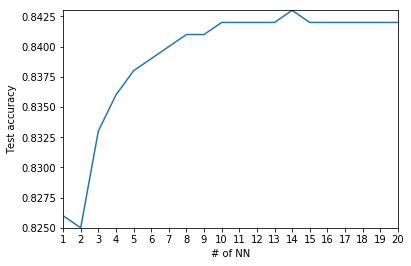

In [42]:
# plot for various # of neighborhoods
plt.plot(k_range, scores)
plt.axis([1, 20, min(scores), max(scores)])
plt.xticks(k_range)
plt.xlabel('# of NN')
plt.ylabel('Test accuracy')

* It is obvious that the accuracy of KNN after MinMax scaling is better than standard scaling.

# Case 4.3 Standard Scaling ON raw data (k=15)

In [9]:
X1_scale2 = StandardScaler().fit_transform(X1)
display(pd.DataFrame(X1_scale2, columns=X1.columns).head())

,annual_inc,emp_length_int,interest_rate,loan_amount,term_cat,loan_condition_cat,home_ownership_cat,purpose_cat,interest_payment_cat
0,0.002526,1.000000,0.225180,0.130435,0.0,0.0,0.0,0.000000,0.0
1,0.003158,0.000000,0.420363,0.057971,1.0,1.0,0.0,0.076923,1.0
2,0.001290,1.000000,0.449514,0.055072,0.0,0.0,0.0,0.153846,1.0
3,0.005179,1.000000,0.345163,0.275362,0.0,0.0,0.0,0.230769,1.0
4,0.008421,0.052632,0.311365,0.072464,1.0,0.0,0.0,0.230769,0.0


In [10]:
# Split dataset to the train and test set 
X_train, X_test, y_train, y_test = train_test_split(X1_scale2, y1, random_state=0, test_size=0.25)
# Create an instance
knn = KNeighborsClassifier(n_neighbors=15, weights='distance')
# Apply KNN to the training set
start=datetime.now()
knn.fit(X_train, y_train)
# Compare the predicted y and actual y
y_pred = knn.predict(X_test)
print (datetime.now()-start)
display(metrics.accuracy_score(y_test, y_pred))

0:08:06.292882


0.8530009691451238

# Case 4.4 Standard Scaling ON raw data (k=15)

In [11]:
X1_scale2 = StandardScaler().fit_transform(X1)
display(pd.DataFrame(X1_scale2, columns=X1.columns).head())

,annual_inc,emp_length_int,interest_rate,loan_amount,term_cat,loan_condition_cat,home_ownership_cat,purpose_cat,interest_payment_cat
0,0.002526,1.000000,0.225180,0.130435,0.0,0.0,0.0,0.000000,0.0
1,0.003158,0.000000,0.420363,0.057971,1.0,1.0,0.0,0.076923,1.0
2,0.001290,1.000000,0.449514,0.055072,0.0,0.0,0.0,0.153846,1.0
3,0.005179,1.000000,0.345163,0.275362,0.0,0.0,0.0,0.230769,1.0
4,0.008421,0.052632,0.311365,0.072464,1.0,0.0,0.0,0.230769,0.0


In [12]:
# Split dataset to the train and test set 
X_train, X_test, y_train, y_test = train_test_split(X1_scale2, y1, random_state=0, test_size=0.1)
# Create an instance
knn = KNeighborsClassifier(n_neighbors=15, weights='distance')
# Apply KNN to the training set
start=datetime.now()
knn.fit(X_train, y_train)
# Compare the predicted y and actual y
y_pred = knn.predict(X_test)
print (datetime.now()-start)
display(metrics.accuracy_score(y_test, y_pred))

0:10:11.413670


0.8580878541323897

# Case 5.1 Robust Scaling on raw dataset

In [13]:
X1_scale3 = RobustScaler().fit_transform(X1)
display(pd.DataFrame(X1_scale3, columns=X1.columns).head())

,annual_inc,emp_length_int,interest_rate,loan_amount,term_cat,loan_condition_cat,home_ownership_cat,purpose_cat,interest_payment_cat
0,-0.911111,0.564286,-0.376812,-0.666667,0.0,0.0,-1.0,-1.666667,0.0
1,-0.777778,-0.792857,0.367150,-0.875000,1.0,1.0,-1.0,-1.333333,1.0
2,-1.172178,0.564286,0.478261,-0.883333,0.0,0.0,-1.0,-1.000000,1.0
3,-0.351111,0.564286,0.080515,-0.250000,0.0,0.0,-1.0,-0.666667,1.0
4,0.333333,-0.721429,-0.048309,-0.833333,1.0,0.0,-1.0,-0.666667,0.0


In [14]:
# Split dataset to the train and test set 
X_train, X_test, y_train, y_test = train_test_split(X1_scale3, y1, random_state=0, test_size=0.25)
# Create an instance
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
# Apply KNN to the training set
start=datetime.now()
knn.fit(X_train, y_train)
# Compare the predicted y and actual y
y_pred = knn.predict(X_test)
print (datetime.now()-start)
display(metrics.accuracy_score(y_test, y_pred))

0:04:36.310831


0.8033762311523812

# Case 5.2 Robust Scaling on PCA(n=5)

In [44]:
# Conduct PCA
# Create instances and fit the model
pca_model = PCA(n_components=5).fit(X1_scale2)
# Convert to a dataframe
X1_trans = pd.DataFrame(pca_model.transform(X1_scale2), columns=['pca1', 'pca2', 'pca3', 'pca4',  'pca5'])
display(X1_trans.head())

,pca1,pca2,pca3,pca4,pca5
0,-0.600901,0.152540,-0.362126,-0.016072,-0.279143
1,0.802580,-0.260676,0.650297,0.861605,-0.450701
2,0.203518,-0.439352,-0.593714,-0.135197,-0.289843
3,0.210642,-0.372705,-0.580720,-0.135590,-0.097121
4,-0.036304,0.402162,0.833884,-0.006345,-0.552889


In [45]:
# Split dataset to the train and test set 
X_train, X_test, y_train, y_test = train_test_split(X1_trans, y1, random_state=0, test_size=0.25)
# Create an instance
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
# Apply KNN to the training set
start=datetime.now()
knn.fit(X_train, y_train)
# Compare the predicted y and actual y
y_pred = knn.predict(X_test)
print (datetime.now()-start)
display(metrics.accuracy_score(y_test, y_pred))

0:00:12.398513


0.8380310577204805

In [46]:
# loop function to choose various # of neighbors
k_range = range(1,21)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance').fit(X_train, y_train)  
    y_pred = knn.predict(X_test)
    scores.append(round(metrics.accuracy_score(y_test, y_pred), 3))
    
print(scores)

[0.826, 0.825, 0.833, 0.836, 0.838, 0.839, 0.84, 0.841, 0.841, 0.842, 0.842, 0.842, 0.842, 0.843, 0.842, 0.842, 0.842, 0.842, 0.842, 0.842]


Text(0, 0.5, 'Test accuracy')

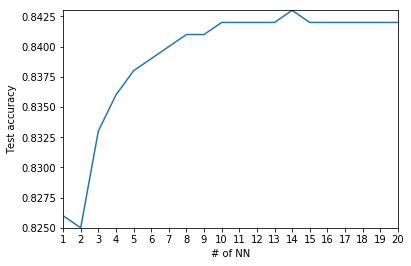

In [47]:
# plot for various # of neighborhoods
plt.plot(k_range, scores)
plt.axis([1, 20, min(scores), max(scores)])
plt.xticks(k_range)
plt.xlabel('# of NN')
plt.ylabel('Test accuracy')

Summary
* Comparing vairous scaling methods, MinMax scaling and robust scaling performs better than standard method according to the KNN accuracy.
* Comparing raw data, pca2 and pca5, pca2 has a better performance in terms of accuracy and speed.
* Comparing various number of neighborhoods, k=15 tends to achieve a highest accurary.
* Comparing "uniform" and "distance", "distance" is better accroding to the accuracy.
* Comparing different size of test, smaller test size (bigger train size) leads to better accurcy.
* Comparing "manhattan distance" and "euclidean", their performance are similar.

In conclusion, the best accuracy that KNN achieves in this experiment is around 84%, when sclaling = MinMax, pca(n=5), k=15, weight = "distance", test size=0.1, p=2 ("euclidean distance"). We may try another model (e.g. random forest) to test if it can achieve a higher predicting accuracy on this dataset.